In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS 
from dash import Dash, html, dcc, Input, Output, callback
from collections import Counter

In [3]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
print(df.dtypes)
print("Null values check")
print(df.isnull().sum())

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year            object
rating                  object
duration                object
listed_in               object
description             object
dtype: object
Null values check
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [9]:
# change the datatypes of date added to datetime and release_year to categorical
df["date_added"] = pd.to_datetime(df["date_added"], format="%B %d, %Y", errors="coerce")
df["release_year"] = df["release_year"].astype("str")

# remove null values for rating, date_added, duration cast and director
df.dropna(subset=["rating", 'date_added', "duration", "cast", "director"], inplace=True)
df.drop_duplicates(inplace=True)

# filling country null values with mode, which is United States. 
df["country"] = df["country"].fillna("United States")

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
# Explore the data 
# bar chart to show movie comparison for values with one country

one_country = df[df["country"].apply(lambda x: len(x.split(",")) == 1)]

fig = px.histogram(
    one_country,
    x="country",
    y="type",
    color="type",
    histfunc="count"
)

fig.update_layout(
    width=1200,
    height=600,
    autosize=False,
)

fig

In [12]:
# for column country with more than one countries in each row
multi_country = df[df["country"].apply(lambda x: len(x.split(",")) > 1)]

fig = px.histogram(
    multi_country,
    x="country",
    y="type",
    color="type",
    histfunc="count",
    barmode="group"
)

fig.update_layout(
    width=1200,
    height=1000,
    autosize=False,
)

fig

In [13]:
# dashboard with dropdowns for rating, duration and listed_in for movies and tv shows.
dashboarddf = df[["show_id", "type", "title", "rating", "duration", "listed_in", "director", "cast", "release_year"]]
dashboarddf_movie = dashboarddf[dashboarddf["type"] == "Movie"]
dashboarddf_tv = dashboarddf[dashboarddf["type"] == "TV Show"]

In [14]:
# identify similar movies based on duration
#convert duration to integer and group movies based on long, medium and short.
dashboarddf_movie_duration = dashboarddf_movie.copy()
dashboarddf_movie_duration["duration"] = dashboarddf_movie_duration["duration"].apply(lambda x: int(x.split()[0]))
dashboarddf_movie_duration["duration"] = dashboarddf_movie_duration["duration"].astype("int")

# categorize duration
bins = np.linspace(dashboarddf_movie_duration["duration"].min(), dashboarddf_movie_duration["duration"].max(), 4)
group_names = ["Short", "Medium", "Long"]
dashboarddf_movie_duration["duration_class"] = pd.cut(dashboarddf_movie_duration["duration"], bins, labels=group_names, include_lowest=True)
dashboarddf_movie_duration["main_genre"] = dashboarddf_movie_duration["listed_in"].apply(lambda x: x.split(",")[0])

dashboarddf_movie_duration["main_genre"].value_counts().to_frame()

,count
main_genre,
Dramas,1585
Comedies,1184
Action & Adventure,848
Children & Family Movies,548
Documentaries,397
Stand-Up Comedy,309
Horror Movies,274
International Movies,122
Classic Movies,73


In [15]:
dashboarddf_movie_duration["rating"].value_counts().to_frame()

,count
rating,
TV-MA,1842
TV-14,1279
R,788
PG-13,477
TV-PG,441
PG,279
TV-Y7,116
TV-Y,97
TV-G,93


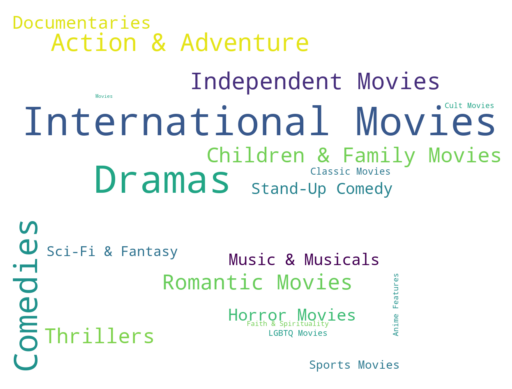

In [22]:
stopwords = set(STOPWORDS)
words = WordCloud(stopwords=stopwords)
word = dashboarddf_movie_duration["listed_in"].str.split(", ").explode().tolist()
word_counts = Counter(word)

wordcloud = WordCloud(width=1200, height=900, background_color='white').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Bar graph showing the total trends in movies and tv shows in each year
df_content_trends = df[["type", "title", "date_added", "release_year"]]
df_content_trends["year_added"] = df_content_trends["date_added"].dt.year
df_content_trends["year_added"] = df_content_trends["year_added"].astype("str")
df_content_trends["release_year"] = df_content_trends["release_year"].astype("str")

fig = px.histogram(
    df_content_trends,
    x="year_added",
    y="type",
    color="type",
    histfunc="count"
)

fig.update_layout(
    width=1200,
    height=600,
    autosize=False,
)

fig

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\1124927744.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\1124927744.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\1124927744.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [24]:
fig = px.histogram(
    df_content_trends,
    x="release_year",
    y="type",
    color="type",
    histfunc="count"
)

fig.update_layout(
    width=1400,
    height=800,
    autosize=False,
)

fig

In [25]:
# most occuring cast and director throughout the year for TV Shows

def popular_director(dataframe):
    dataframe["release_year"] = dataframe["release_year"].astype("str")
    
    popular_directors = dataframe.groupby("release_year")['director'].apply(lambda x: x.value_counts().index[0]).to_frame(name="most_frequent_director")
    
    popular_directors = popular_directors.reset_index()
    
    return popular_directors

In [26]:
popular_director(dashboarddf_tv)

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\3223340311.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,release_year,most_frequent_director
0,1990,Ken Burns
1,2001,Alastair Fothergill
2,2006,Takuya Igarashi
3,2008,James Lee
4,2010,Yasuhiro Irie
5,2011,Hsu Fu-chun
6,2012,Tsutomu Mizushima
7,2013,Cecilia Peck
8,2014,Michael Simon
9,2015,BB Sasore


In [27]:
popular_director(dashboarddf_movie)

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\3223340311.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,release_year,most_frequent_director
0,1942,John Ford
1,1944,"Frank Capra, John Huston, Hugh Stewart, Roy Bo..."
2,1945,"Frank Capra, Joris Ivens"
3,1946,John Huston
4,1947,"William Wyler, John Sturges"
...,...,...
67,2017,Marcus Raboy
68,2018,"Raúl Campos, Jan Suter"
69,2019,Fernando Ayllón
70,2020,Kayode Kasum


In [28]:
# most popular actors
def popular_actors(dataframe):
    dataframe["release_year"] = dataframe["release_year"].astype("str")
    
    popular_actors = (
        dataframe.groupby("release_year")
        .agg(most_frequent_actor=("cast", lambda x: x.str.split(",").explode().value_counts().index[0]))
        .reset_index()
    )
    
    return popular_actors

In [29]:
popular_actors(dashboarddf_tv)

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\943748735.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,release_year,most_frequent_actor
0,1990,Sam Waterston
1,2001,David Attenborough
2,2006,Maaya Sakamoto
3,2008,Berg Lee
4,2010,Romi Park
5,2011,Roy Chiu
6,2012,Mai Fuchigami
7,2013,Linor Abargil
8,2014,Jeff Foxworthy
9,2015,Damilola Adegbite


In [30]:
popular_actors(dashboarddf_movie)

C:\Users\medio\AppData\Local\Temp\ipykernel_22248\943748735.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,release_year,most_frequent_actor
0,1942,Henry Fonda
1,1944,Burgess Meredith
2,1945,Walter Huston
3,1946,Walter Huston
4,1947,James Stewart
...,...,...
67,2017,Mohammed Tharwat
68,2018,Rupa Bhimani
69,2019,Bayoumi Fouad
70,2020,Keith Wickham


In [31]:
# top ten ratings in movies 
dashboarddf_movie["rating"].value_counts().to_frame().head(10)

,count
rating,
TV-MA,1842
TV-14,1279
R,788
PG-13,477
TV-PG,441
PG,279
TV-Y7,116
TV-Y,97
TV-G,93


In [32]:
#top ten ratings in tv shows
dashboarddf_tv["rating"].value_counts().to_frame().head(10)

,count
rating,
TV-MA,97
TV-14,49
TV-PG,12
TV-Y7,7
TV-Y,5
TV-G,3
R,1
